# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Feature Scaling

In [3]:
#apply normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### Creating a data structure with 60 timesteps and 1 output

In [4]:
#Create a data structure to hold the 60 data points (open price) before the input to predict the future output

X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0]) #60 previous stock prices
    y_train.append(training_set_scaled[i, 0]) #stock price at time t+1

X_train, y_train = np.array(X_train), np.array(y_train) #converting to numpy array
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

### Reshaping

In [5]:
#indicate how many indicators you use
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #has 3 dimensions, using 1 indicator 

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [7]:
regressor = Sequential() #predicting a continous value 

### Adding the first LSTM layer and some Dropout regularisation

In [8]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) # 20% of the neurons will be ignored during each iteration

### Adding a second LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True)) #dont have to specify input shape after first layer
regressor.add(Dropout(0.2)) 

### Adding a third LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2)) 

### Adding a fourth LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50)) #not going to return any more sequences 
regressor.add(Dropout(0.2))

### Adding the output layer

In [12]:
regressor.add(Dense(units=1)) # neuron equals to dimension of output

### Compiling the RNN

In [13]:
regressor.compile(optimizer = 'adam', loss='mean_squared_error')#loss function is a regression so should be "mean_squared error"

### Fitting the RNN to the Training set

In [14]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 10s 103ms/step - loss: 0.0368
Epoch 2/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0060
Epoch 3/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0053
Epoch 4/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0042
Epoch 8/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0043
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [15]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

### Getting the predicted stock price of 2017

In [16]:
#predict from the 60 previous points
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']), axis=0) #training + test set, axis = 0 is for vertical and 1 for horizontal
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values #getting the last 60 data points
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

#creating the data structure
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0]) #60 previous stock prices
X_test = np.array(X_test) #converting to numpy array

#reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Predict
predicted_stock_price = regressor.predict(X_test)

#inverse the scaled value
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

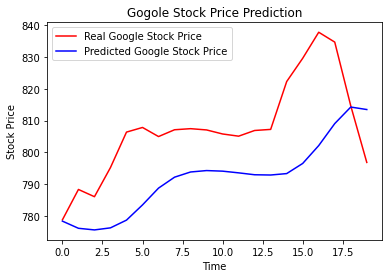

In [17]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Gogole Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show() #to display the chart

Evaluating the RNN

In [18]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
rmse/800

0.02439842632765745